In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import heapq
from pathlib import Path
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import warnings
sns.set_palette("pastel", 9)
#husl

In [18]:
df_train = pd.read_csv(Path("adults_data","adults_cleaned_train_data.csv"))
df_test = pd.read_csv(Path("adults_data","adults_cleaned_test_data.csv"))

In [19]:
region_mapping = {
    'United-States': "United-States",
    'Cuba' : "Middle America", 
    'Jamaica': "Middle America", 
    'India': "South Asia",
    'Mexico': "Mexico",
    'South': np.nan,    #### ??????
    'Puerto-Rico': "Middle America", 
    'Honduras': "Middle America", 
    'England': "West Europe", 
    'Canada': "Canada",
    'Germany': "Central Europe", 
    'Iran': "West Asia", 
    'Philippines': "Southeast Asia", 
    'Italy': "Central Europe", 
    'Poland': "East Europe",
    'Columbia': "South America", 
    'Cambodia': "Southeast Asia", 
    'Thailand': "Southeast Asia", 
    'Ecuador': "South America", 
    'Laos': "Southeast Asia",
    'Taiwan': "West Asia", 
    'Haiti': "Middle America", 
    'Portugal': "West Europe", 
    'Dominican-Republic': "Middle America",
    'El-Salvador': "Middle America", 
    'France': "West Europe", 
    'Guatemala': "Middle America", 
    'China': "East Asia", 
    'Japan': "East Asia",
    'Yugoslavia' : "East Europe", 
    'Peru': "South America", 
    'Outlying-US': "Outlying-US", 
    'Scotland': "West Europe",
    'Trinadad&Tobago': "South America", 
    'Greece': "South Europe", 
    'Nicaragua': "Middle America", 
    'Vietnam': "Southeast Asia", 
    'Hong': np.nan,           #### ??????
    'Ireland': "West Europe", 
    'Hungary': "East Europe", 
    'Holand-Netherlands': "Central Europe"
}

In [20]:
df_raw = pd.read_csv(Path("adults_data","adults_raw_uni_train_data.csv"))

df_raw["native-country"] = df_raw["native-country"].map(region_mapping, na_action="ignore")
df_raw = df_raw.rename(columns={'native-country':'region'})

df_raw.to_csv(Path("adults_data","adults_raw_reg_train_data.csv"), index=None)


In [21]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
def save(title):
    plt.savefig(f'report/images/{title}.pdf', format='pdf', bbox_inches='tight')

In [23]:
def count_sth_grouped(data, value_up, column, compare_column, title,
                      relation='equal', value_down=None, ax=None, rotat=60,
                      hue_col=None):
    colors = sns.color_palette("Greens", len(data.columns))

    if hue_col is None:
        data = data[[column, compare_column]]
    else:
        data = data[[column, compare_column, hue_col]]
    
    if relation == 'equal':
        df_reduced = data[data[column] == value_up]
    if relation == 'le':
        df_reduced = data[data[column] <= value_up]
    if relation == 'ge':
        df_reduced = data[data[column] >= value_up]
    if relation == "not equal":
        df_reduced = data[data[column] != value_up]
    if relation == 'between':
        df_reduced = data[(data[column] <= value_up) & (data[column] > value_down)]
    if relation == 'l':
        df_reduced = data[data[column] < value_up]
    if relation == 'g':
        df_reduced = data[data[column] > value_up]
        
    if hue_col is None:
        df_reduced = df_reduced.groupby([compare_column]).count()
        df_reduced = df_reduced.reset_index()
        cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
                               errorbar=None, color=colors[5])
    else:
        df_reduced = df_reduced.groupby([compare_column, hue_col]).count()
        df_reduced = df_reduced.reset_index()
        cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, hue=hue_col, ax=ax,
                               errorbar=None, palette="Greens")
        
    for p in cnt_plot.patches:
        if p.get_height() != 0:  
            cnt_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    
    #cnt_plot.set_xticks(range(len(df_reduced[compare_column])))
    #cnt_plot.set_xticklabels(df_reduced[compare_column], rotation=rotat)

    cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
    cnt_plot.set_ylabel("count")
    cnt_plot.set_title(title) #wroc
    plt.tight_layout()

In [24]:
def draw_subplots_high(data, column, compare_column, rotat_value, hue_col=None, 
                       horiz_space=1, sub_hight=8):

    fig, axes = plt.subplots(2,2, figsize=(16,sub_hight))

    #plt.suptitle("Suspiciously high values of working hours", fontweight = "bold")

    count_sth_grouped(data, 99, column, compare_column, "99",
                    'equal', ax=axes[0,0], rotat=rotat_value, hue_col=hue_col)
    
    count_sth_grouped(data, 100, column, compare_column, "96-99",
                    'between', 95, ax=axes[0,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 95, column, compare_column, "91-95",
                    'between', 90, ax=axes[1,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 90, column, compare_column, "81-90",
                    'between', 80, ax=axes[1,1], rotat=rotat_value, hue_col=hue_col)

    """count_sth_grouped(data, 80, 'hours-per-week', compare_column, "71-80",
                    'between', 70, ax=axes[2,0], rotat=rotat_value, hue_col=hue_col)"""

    plt.subplots_adjust(hspace=horiz_space)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


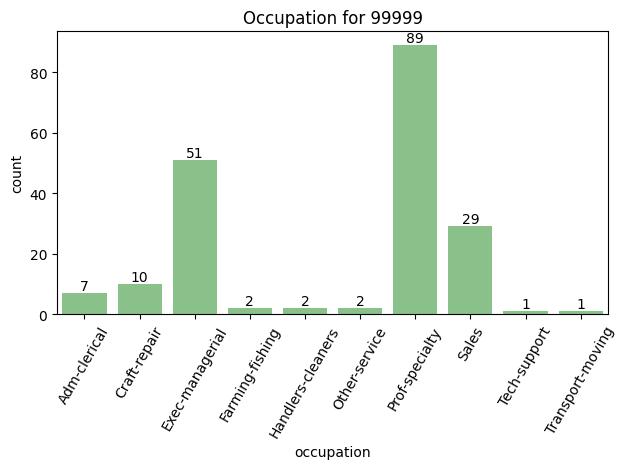

In [25]:
count_sth_grouped(df_train, 99999, 'capital', 'occupation', "Occupation for 99999",
                  relation = 'equal')

# high amount of time spent at work

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


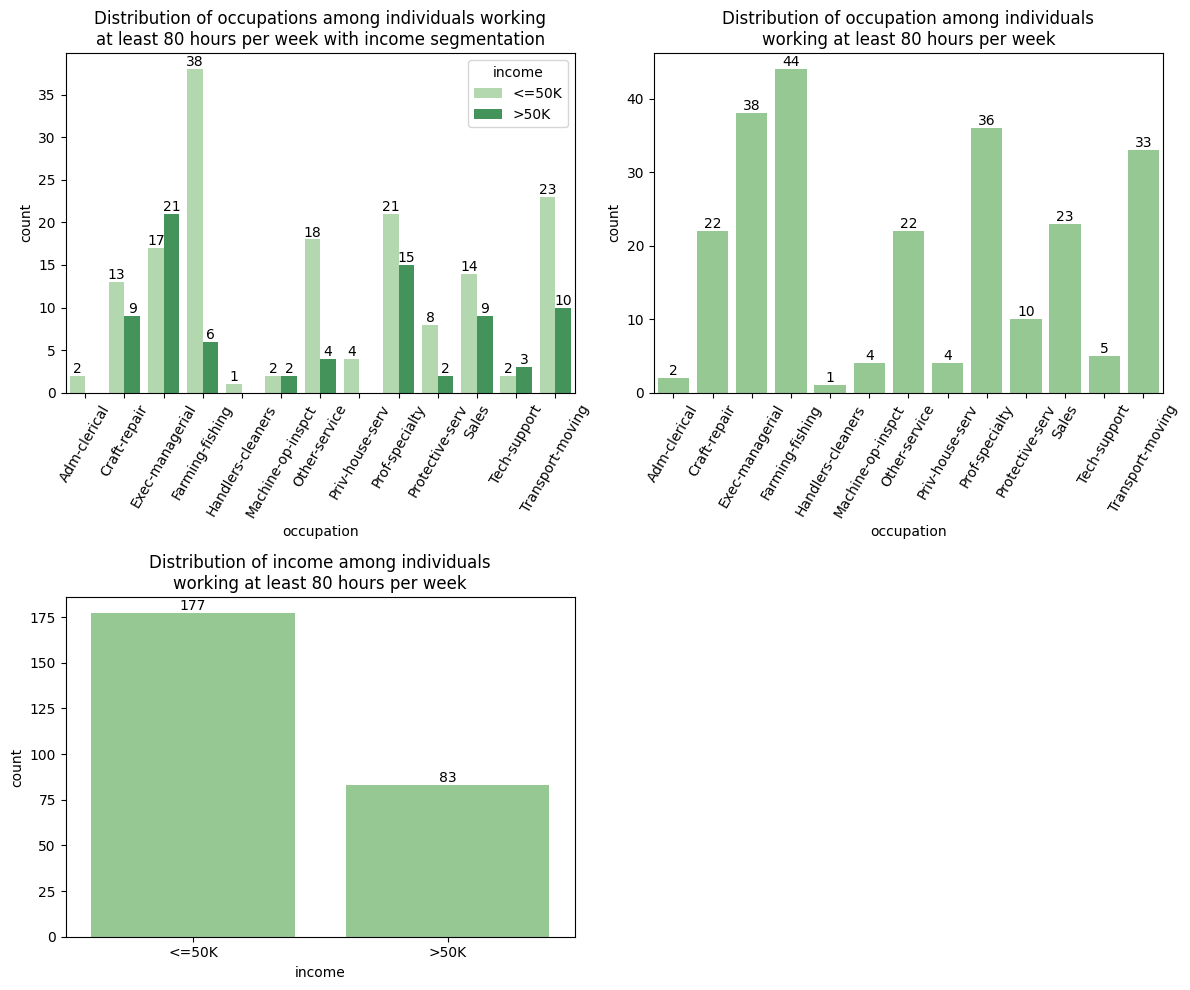

In [26]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
fig.delaxes(axes[1,1])  # Usunięcie ostatniego subplotu

count_sth_grouped(df_raw, 80, 'hours-per-week', 'occupation', 
                  title="Distribution of occupations among individuals working\nat least 80 hours per week with income segmentation",
                  relation='g', hue_col="income", ax=axes[0,0])
count_sth_grouped(df_raw, 80, 'hours-per-week', 'income', 
                  title="Distribution of income among individuals\nworking at least 80 hours per week",
                  relation='g', ax=axes[1,0], rotat=0)

count_sth_grouped(df_raw, 80, 'hours-per-week', 'occupation', 
                  title="Distribution of occupation among individuals\nworking at least 80 hours per week",
                  relation='g', ax=axes[0,1], rotat=60)

plt.tight_layout()
save('hours80')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

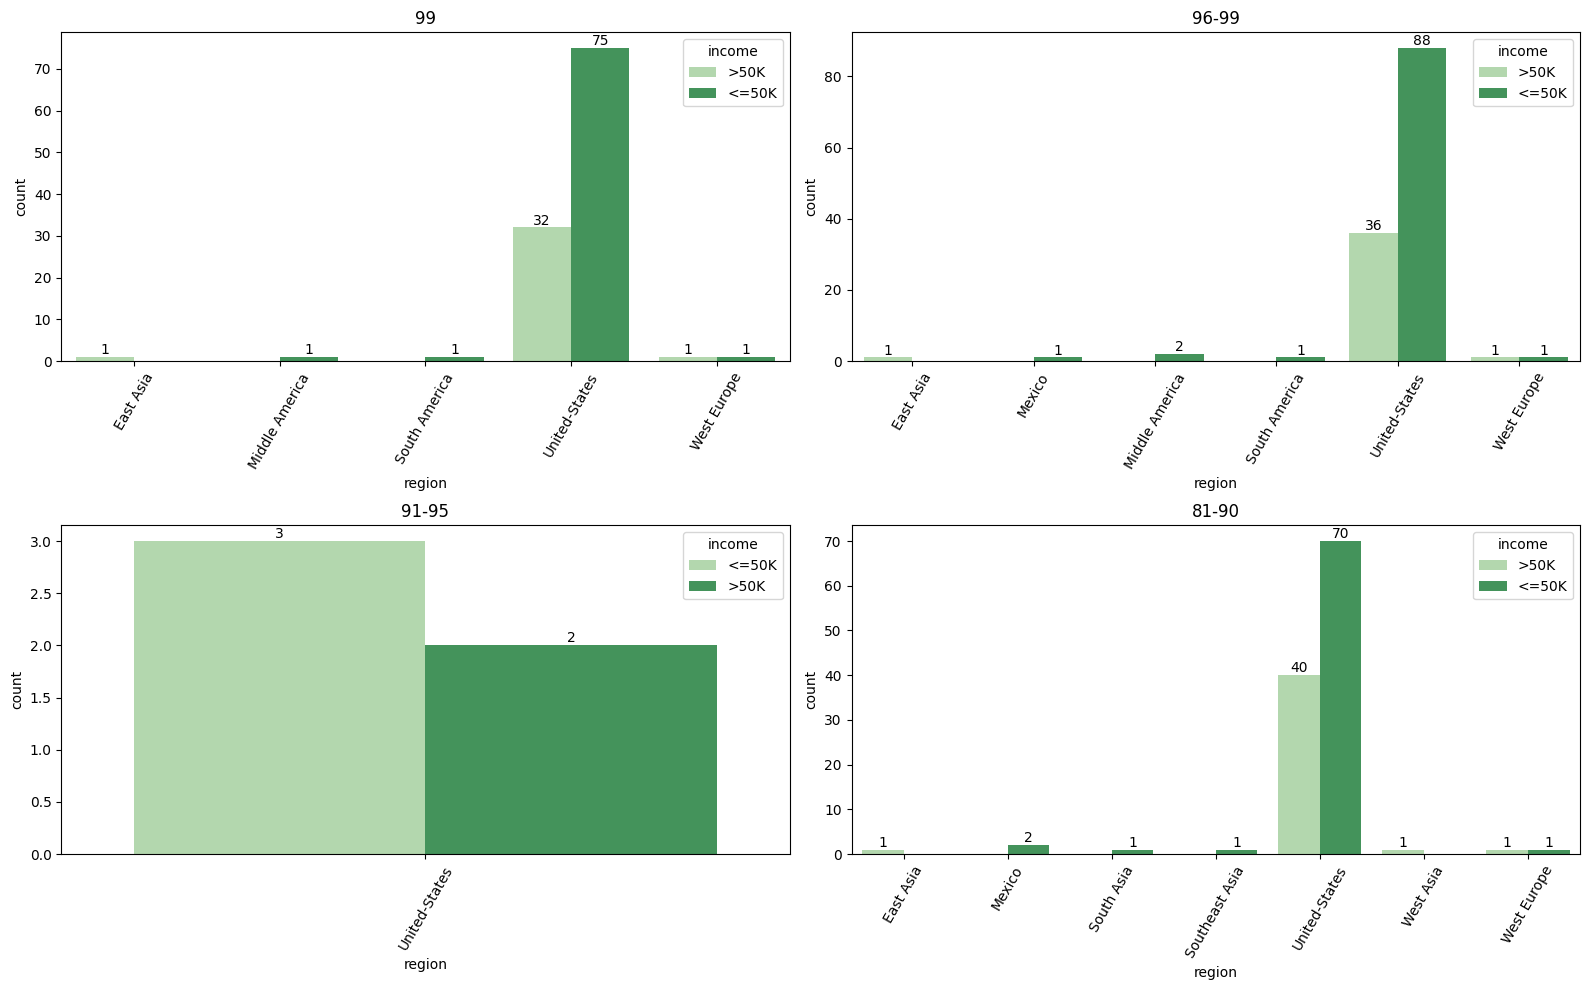

In [27]:
draw_subplots_high(df_raw, 'hours-per-week', 'region',60, hue_col="income", 
                   sub_hight=10, horiz_space=0.5) #wroc
save('region80.pdf')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

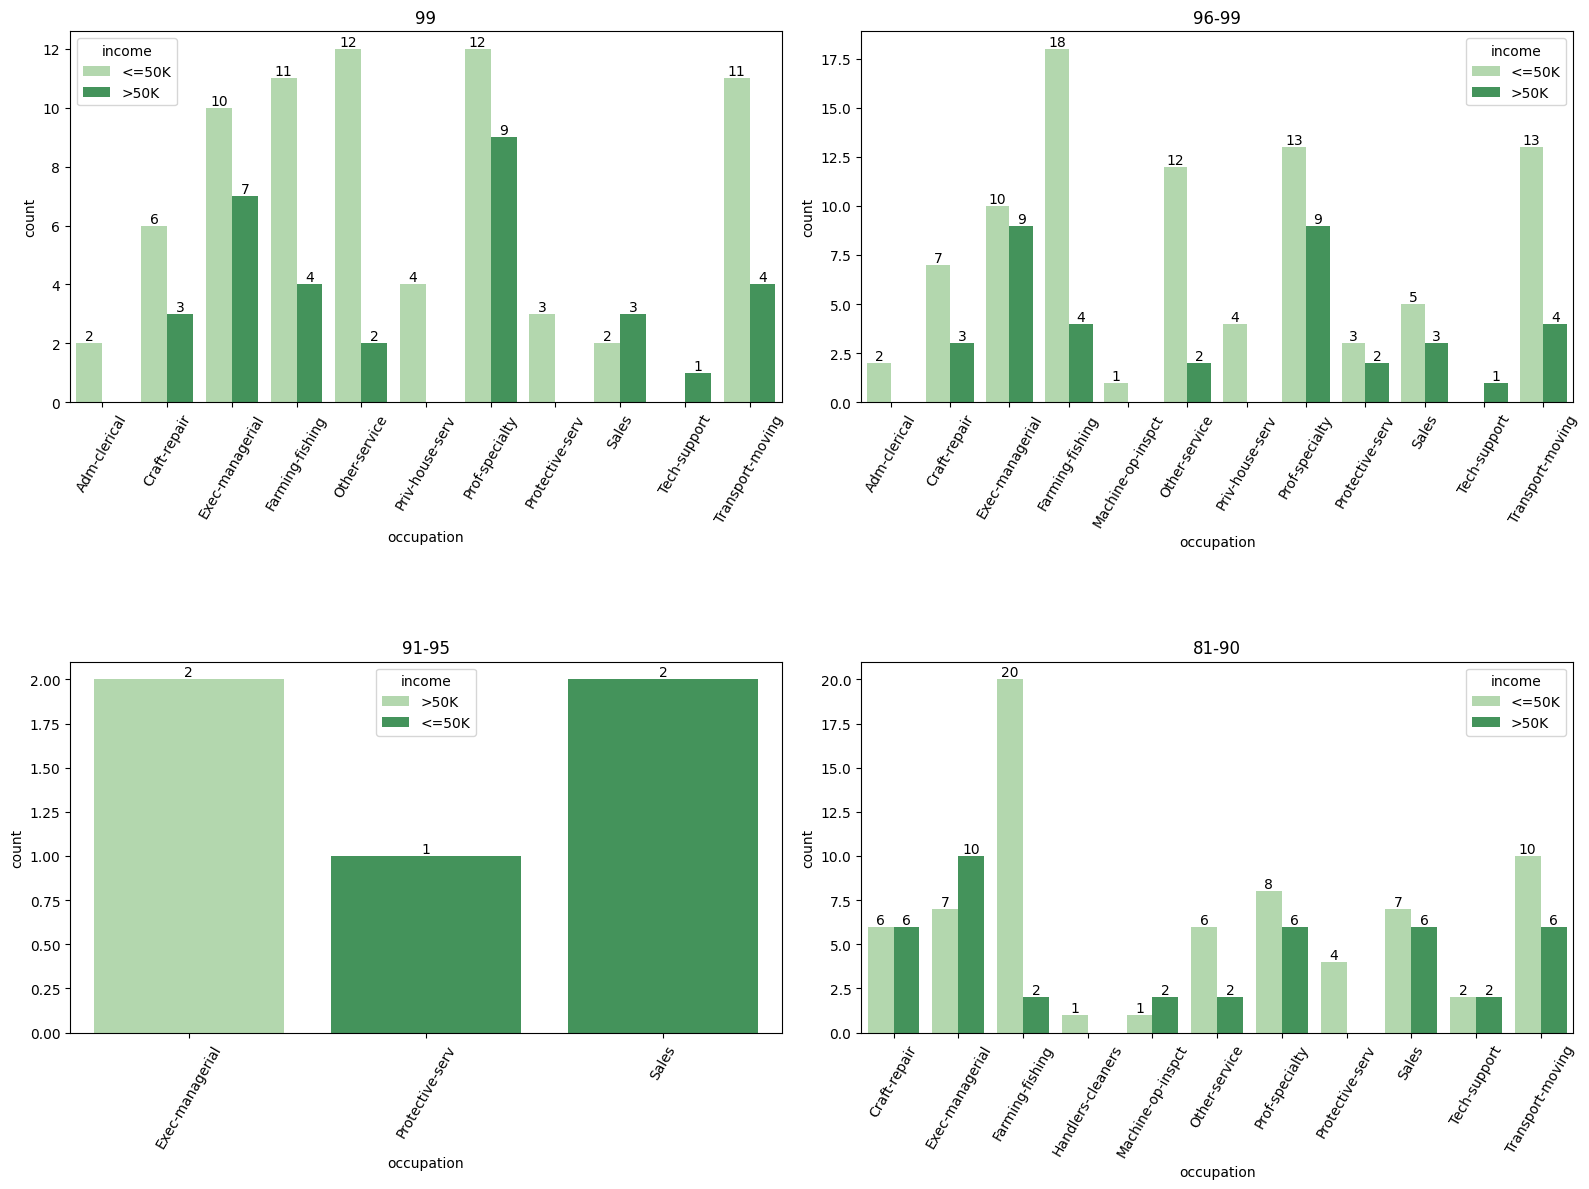

In [28]:
draw_subplots_high(df_train, 'hours-per-week', "occupation", 60, sub_hight=12, horiz_space=0.7,
                hue_col="income")
save('high_occup_sub')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

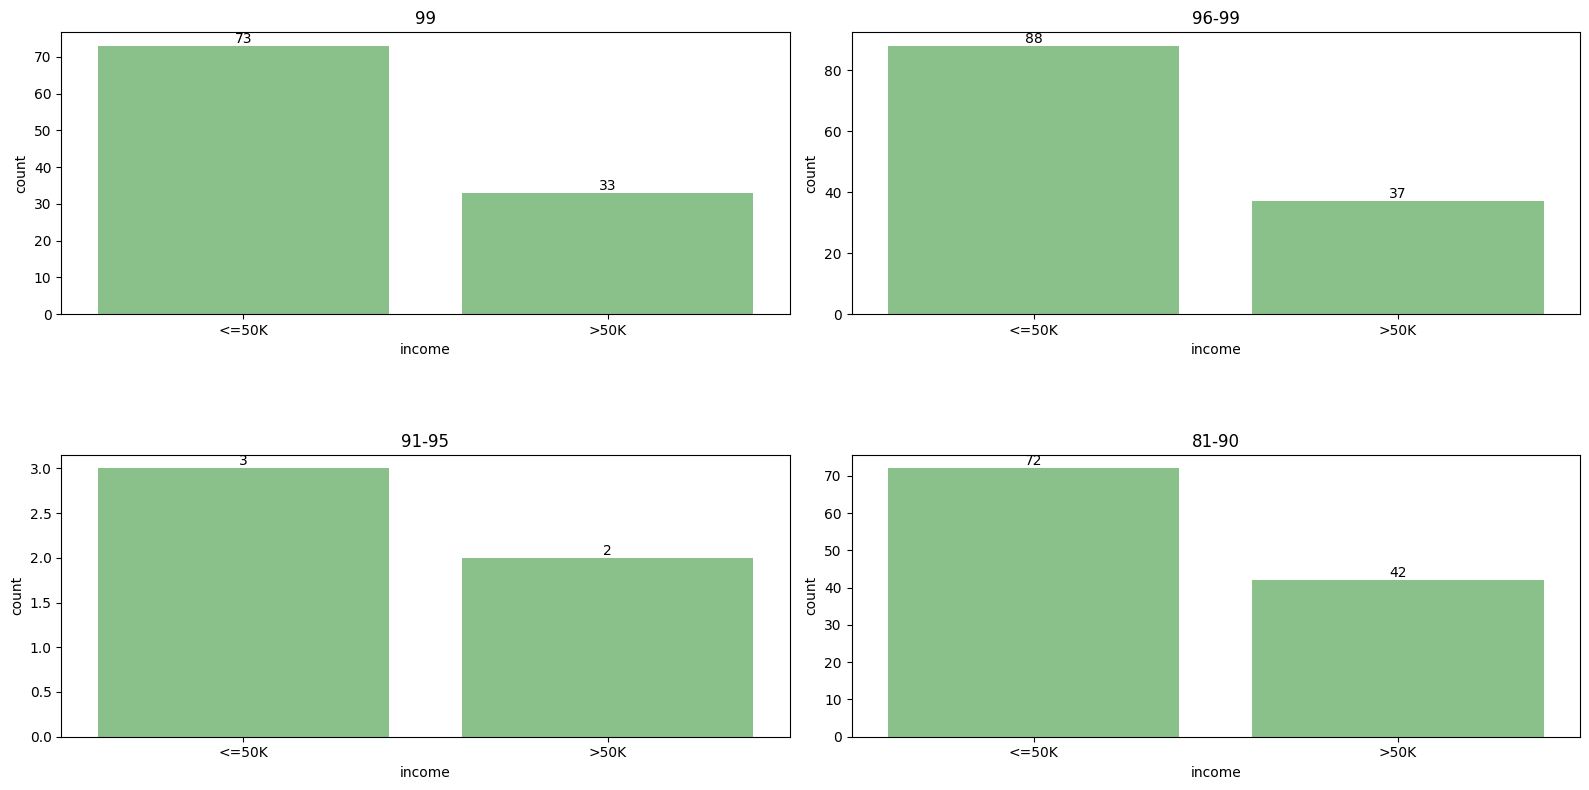

In [29]:
draw_subplots_high(df_train,'hours-per-week', "income", 0, horiz_space=0.5)

# low amount of time spent at work

In [30]:
def draw_subplots_low(data, column, compare_column, rotat_value, hue_col=None,
                      horiz_space=1, sub_height=13):

    fig, axes = plt.subplots(3,2, figsize=(12,sub_height))
    fig.delaxes(axes[2,1])  # Usunięcie ostatniego subplotu
    #plt.suptitle("Suspiciously low values of working hours", fontweight = "bold")

    count_sth_grouped(data, 1, column, compare_column, "1",
                    'equal',ax=axes[0,0], rotat=rotat_value, hue_col=hue_col)
    
    count_sth_grouped(data, 5, column, compare_column, "1-5",
                    'between', -1, ax=axes[0,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 10, column, compare_column, "6-10",
                    'between', 5, ax=axes[1,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 15, column, compare_column, "11-15",
                    'between', 10, ax=axes[1,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 25, column, compare_column, "16-25",
                    'between', 15, ax=axes[2,0], rotat=rotat_value, hue_col=hue_col)

    """count_sth_grouped(data, 0, 'hours-per-week', compare_column, "0",
                    'equal',ax=axes[2,0], rotat=rotat_value, hue_col=hue_col)"""

    plt.subplots_adjust(hspace=horiz_space)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


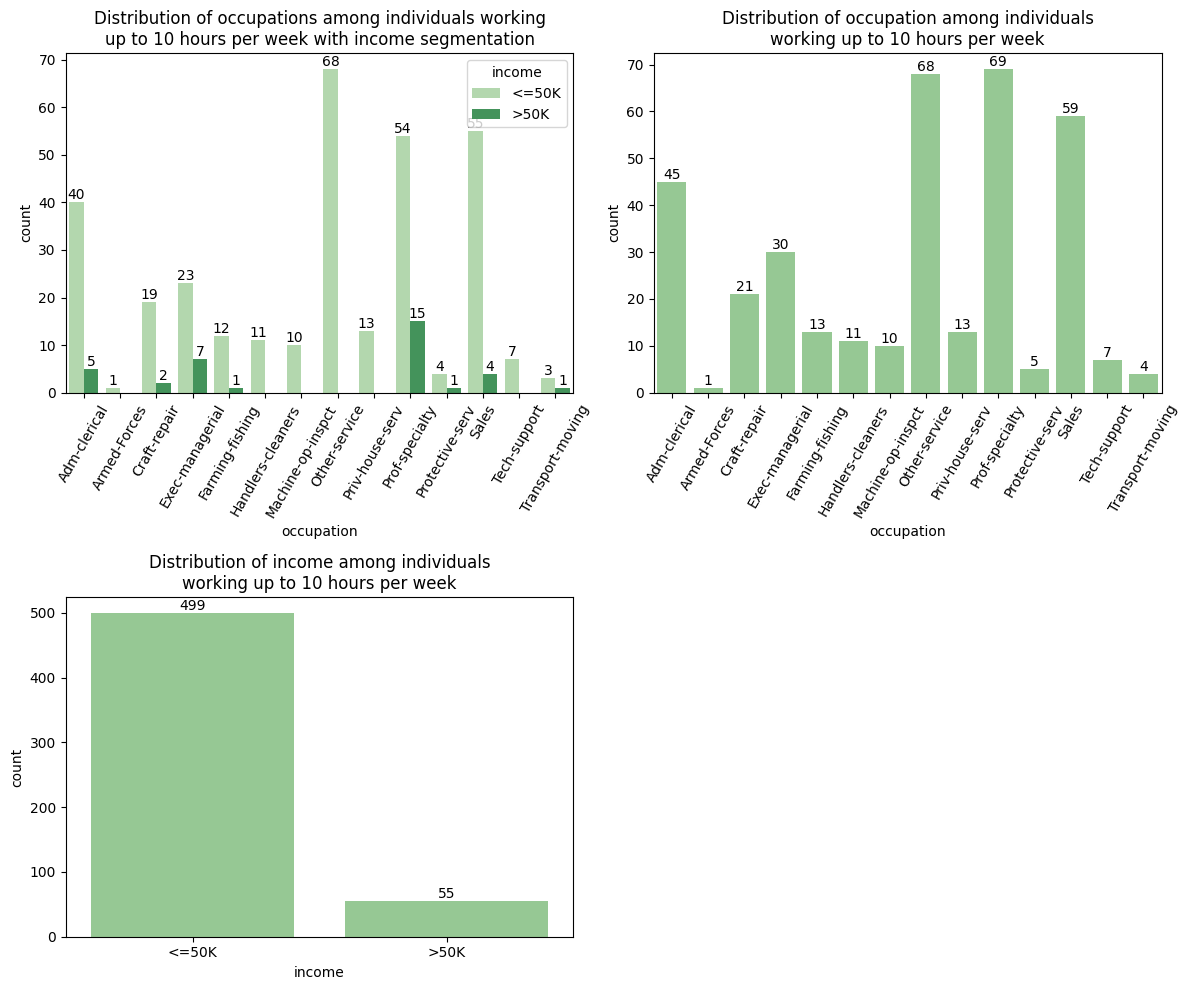

In [31]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
fig.delaxes(axes[1,1])  # Usunięcie ostatniego subplotu

count_sth_grouped(df_raw, 10, 'hours-per-week', 'occupation', 
                  title="Distribution of occupations among individuals working\nup to 10 hours per week with income segmentation",
                  relation='l', hue_col="income", ax=axes[0,0])
count_sth_grouped(df_raw, 10, 'hours-per-week', 'income', 
                  title="Distribution of income among individuals\nworking up to 10 hours per week",
                  relation='l', ax=axes[1,0], rotat=0)

count_sth_grouped(df_raw, 10, 'hours-per-week', 'occupation', 
                  title="Distribution of occupation among individuals\nworking up to 10 hours per week",
                  relation='l', ax=axes[0,1], rotat=60)

plt.tight_layout()
save('hours10')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

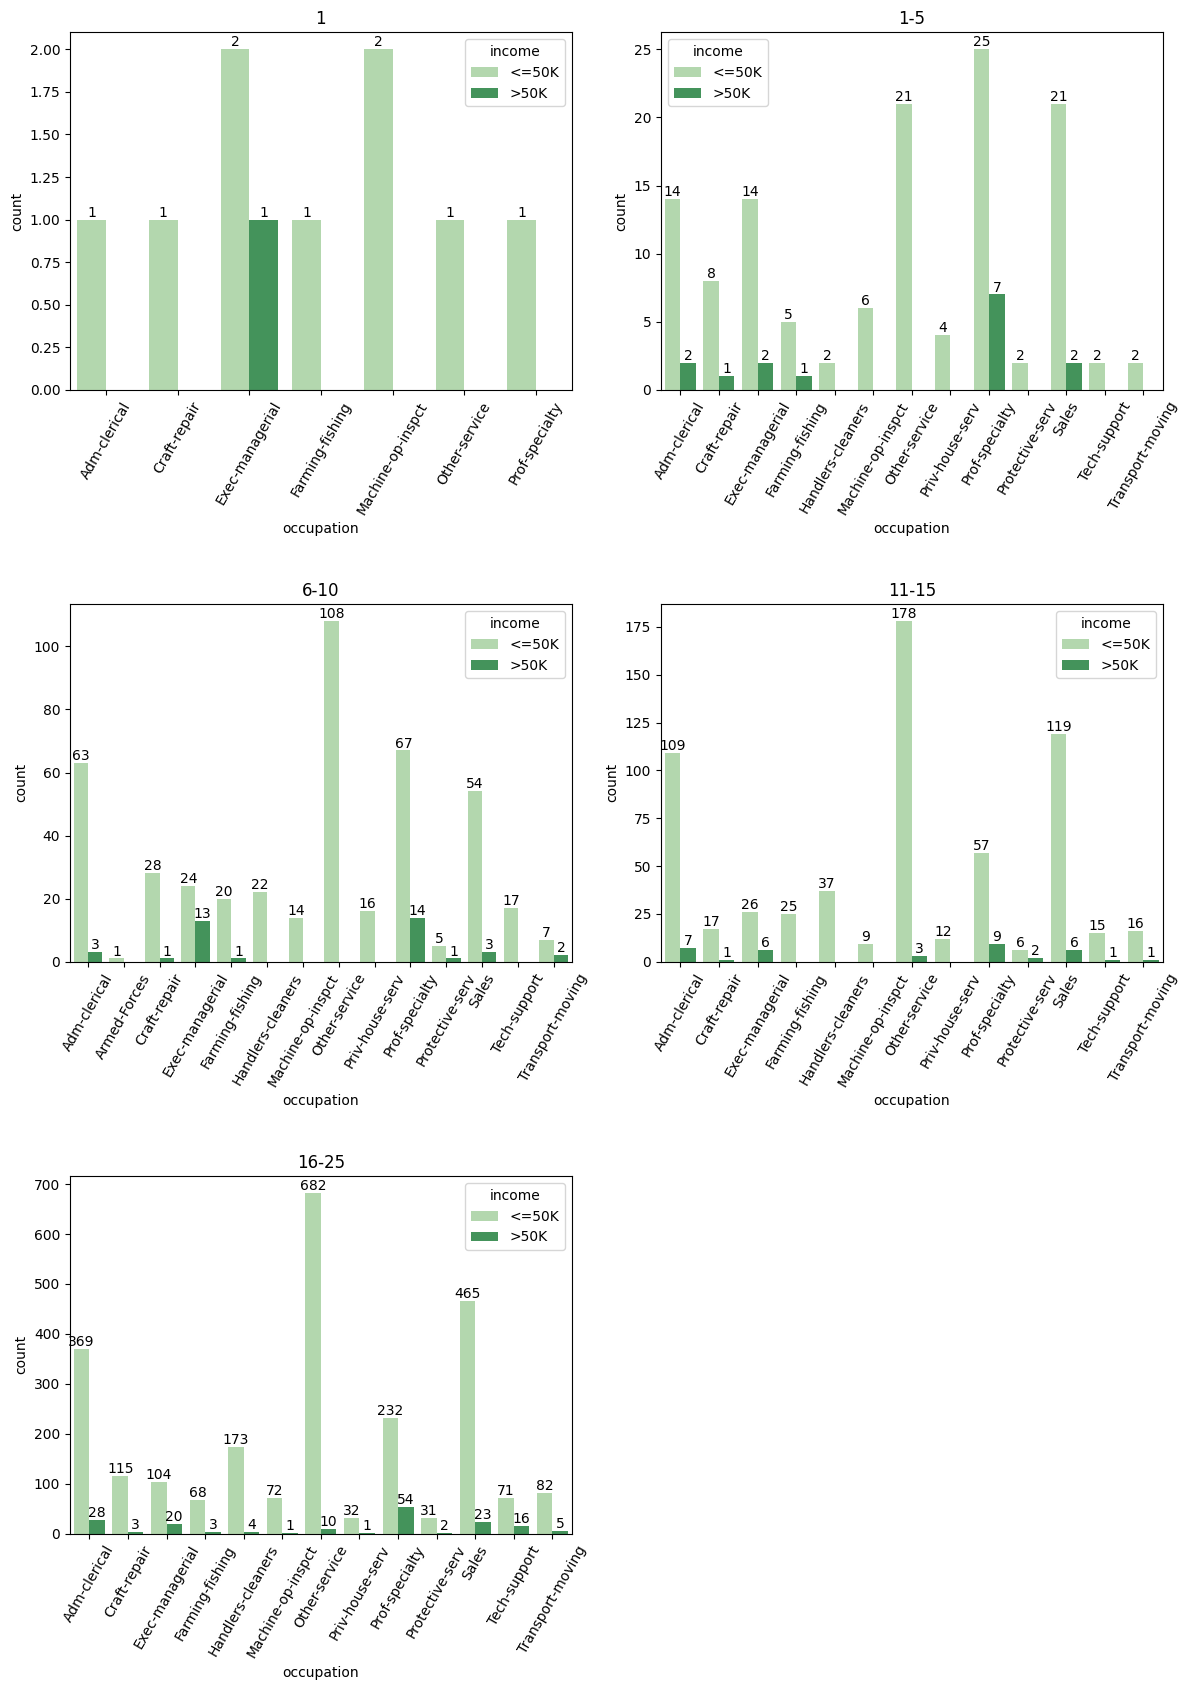

In [32]:
draw_subplots_low(df_train, "hours-per-week","occupation",60, hue_col="income", 
                  sub_height=17, horiz_space=0.6)
save('low_occup_sub')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c

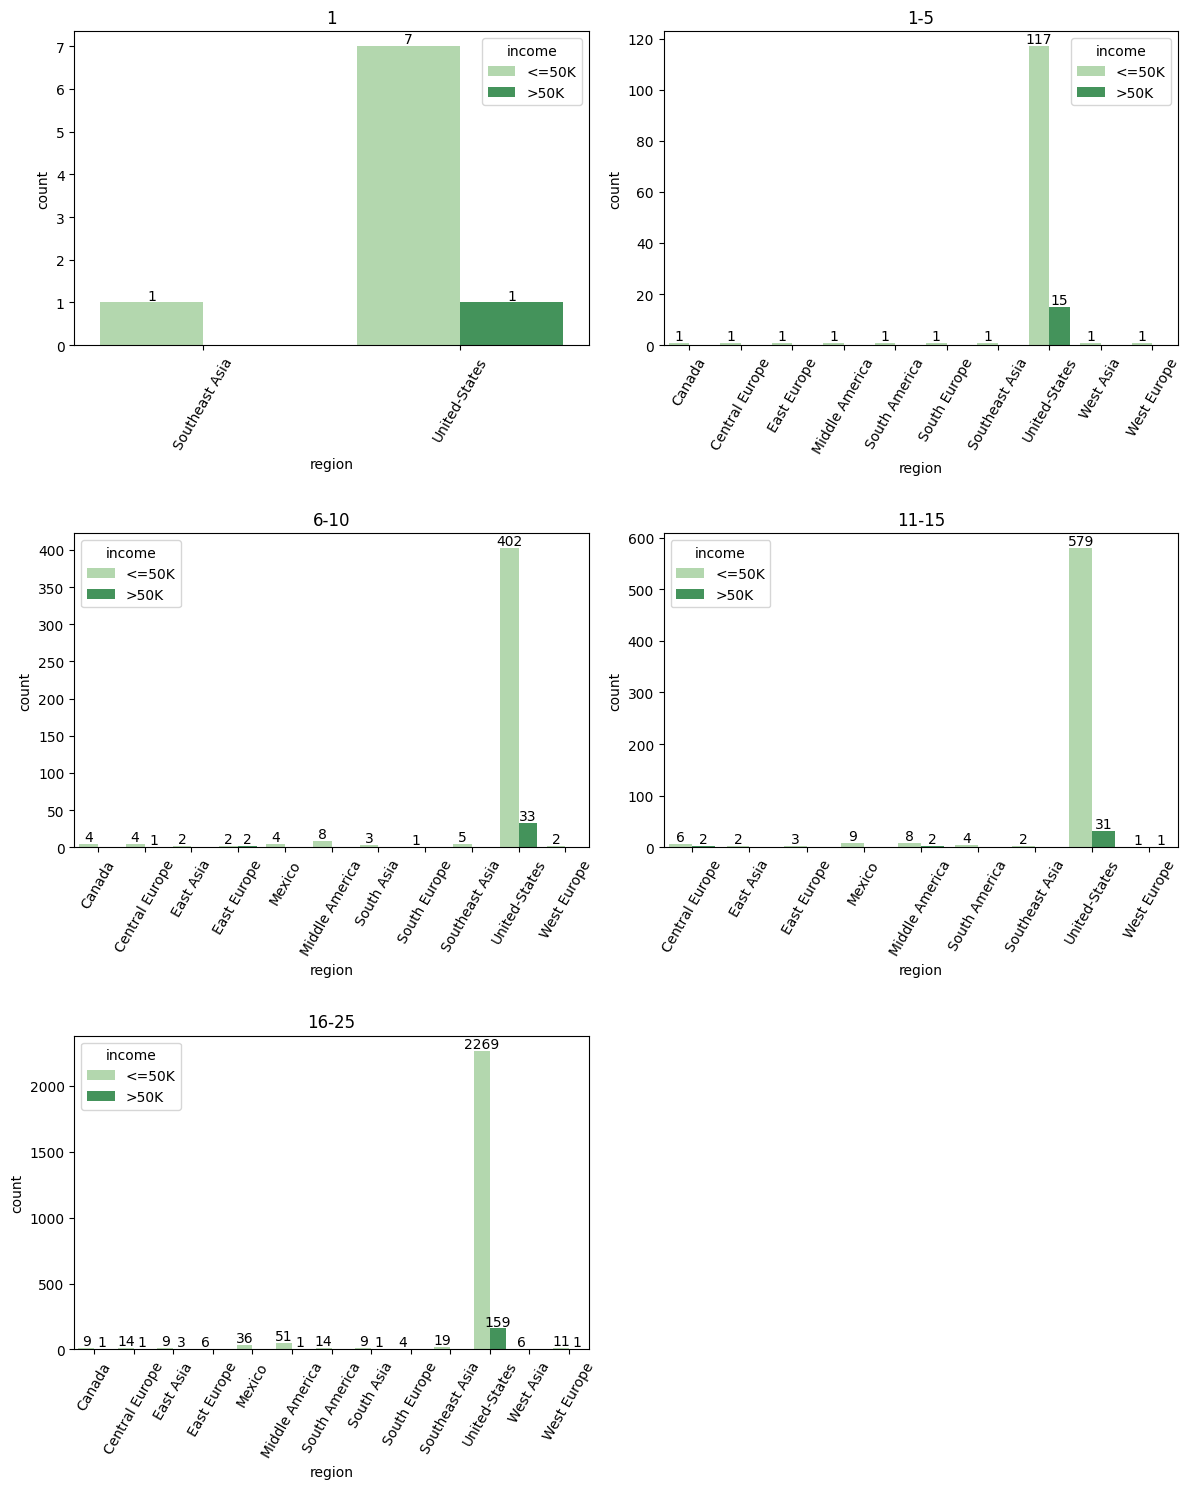

In [33]:
draw_subplots_low(df_train, "hours-per-week", "region",60, horiz_space=0.6, 
                  sub_height=15, hue_col="income")
save("region10.pdf")

# 9999

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


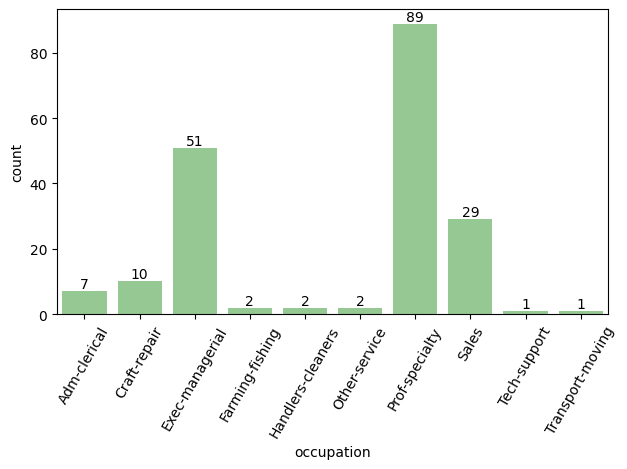

In [34]:
count_sth_grouped(df_raw, 99999, "capital", "occupation", title=None)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


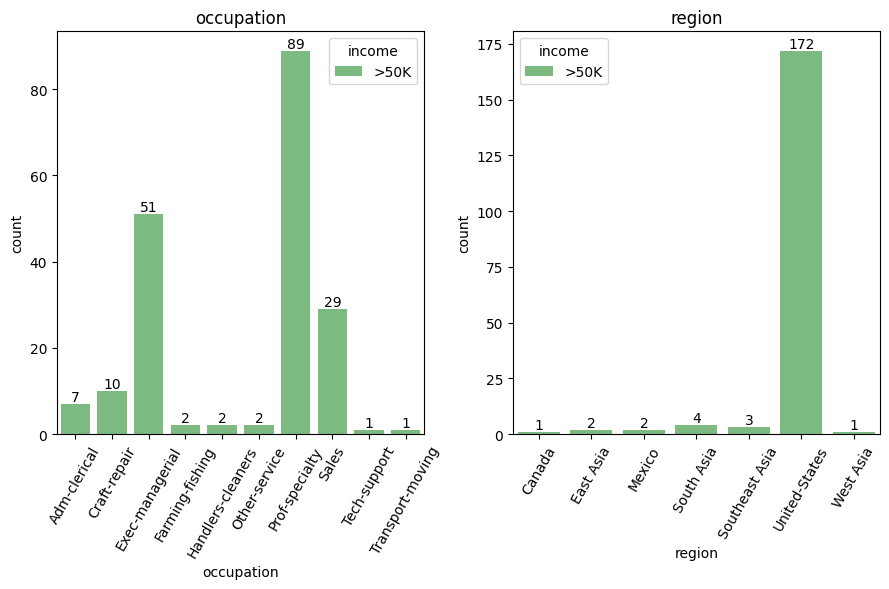

In [35]:
fig, axes = plt.subplots(1,2, figsize=(9,6))
#fig.delaxes(axes[2,1])

count_sth_grouped(df_train, 99999, 'capital', 'occupation', 
                  title="occupation",
                  relation='equal', hue_col="income", ax=axes[0])

count_sth_grouped(df_train, 99999, 'capital', 'region', 
                  title="region",
                  relation='equal', hue_col="income", ax=axes[1])


save('99999')

# capital = 0

In [36]:
file_path = Path('adults_data','adults_imputed_train_data.csv')
imputed = pd.read_csv(file_path)
imputed['income'] = imputed['income'].replace({0:"<=50K",
                                            1: ">50K"})

In [37]:
imputed[imputed['capital'] == 0]

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
0,18-24,Federal-gov,10.0,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0.0,40.0,United-States,<=50K
1,61-70,Self-emp-inc,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,40.0,United-States,<=50K
2,25-30,Private,10.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,40.0,United-States,<=50K
4,31-40,Private,9.0,Married-civ-spouse,Sales,Wife,White,Female,0.0,30.0,United-States,<=50K
5,41-50,Private,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,65.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
36817,31-40,Private,8.0,Separated,Other-service,Not-in-family,White,Female,0.0,30.0,United-States,<=50K
36818,31-40,Private,9.0,Divorced,Handlers-cleaners,Unmarried,White,Male,0.0,30.0,United-States,<=50K
36819,18-24,Private,9.0,Never-married,Adm-clerical,Own-child,Black,Female,0.0,40.0,United-States,<=50K
36820,31-40,Private,13.0,Never-married,Sales,Not-in-family,White,Male,0.0,40.0,United-States,<=50K


# capital != 0

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


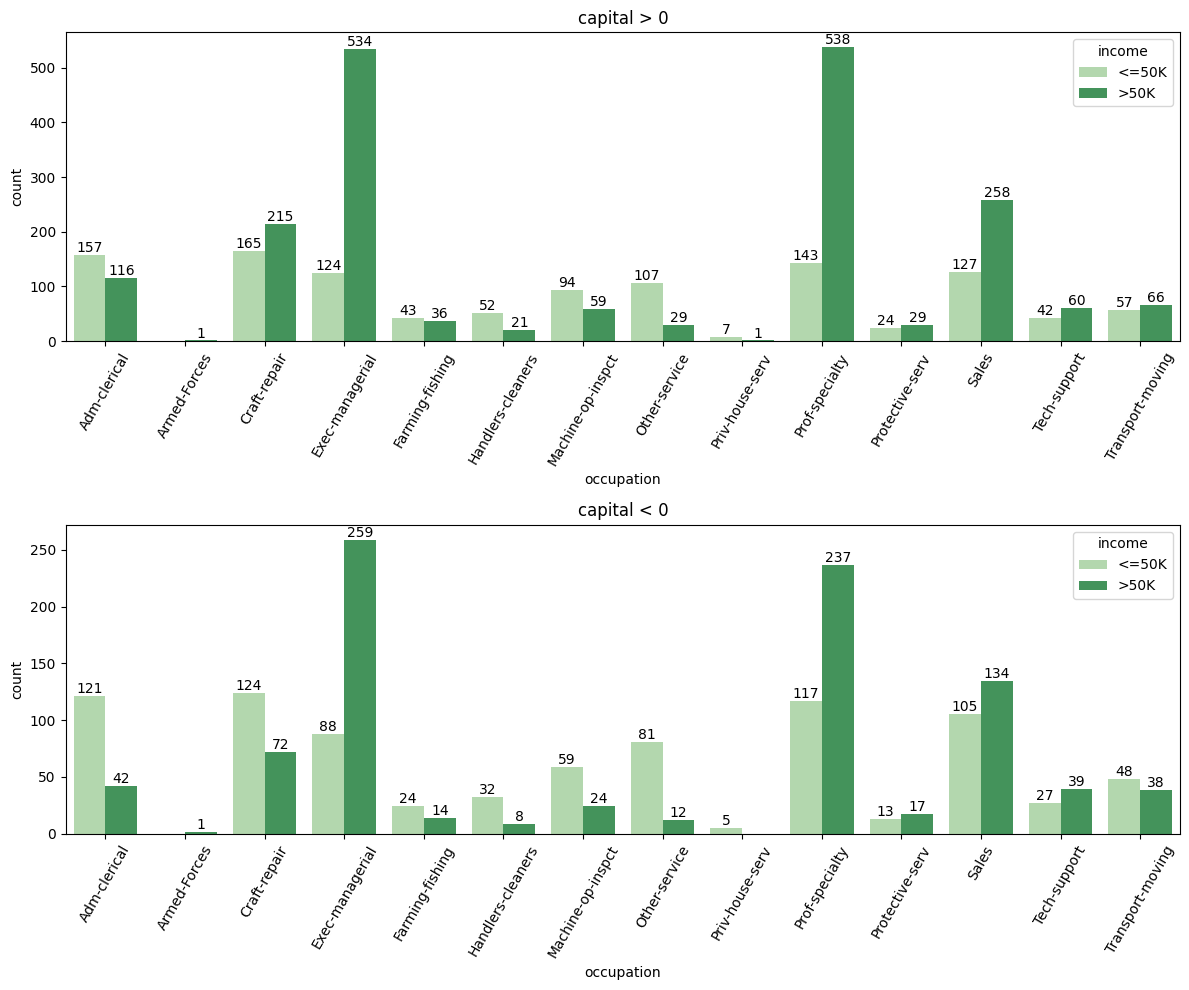

In [38]:
fig, axes = plt.subplots(2,1,figsize=(12,10))
count_sth_grouped(imputed, 0, "capital", "occupation", 
                  title="capital > 0",
                  relation="g", hue_col="income",
                  ax=axes[0])

count_sth_grouped(imputed, 0, "capital", "occupation", 
                  title="capital < 0",
                  relation="l", hue_col="income",
                  ax=axes[1])
save('capital0occupation')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_12052\2624692679.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


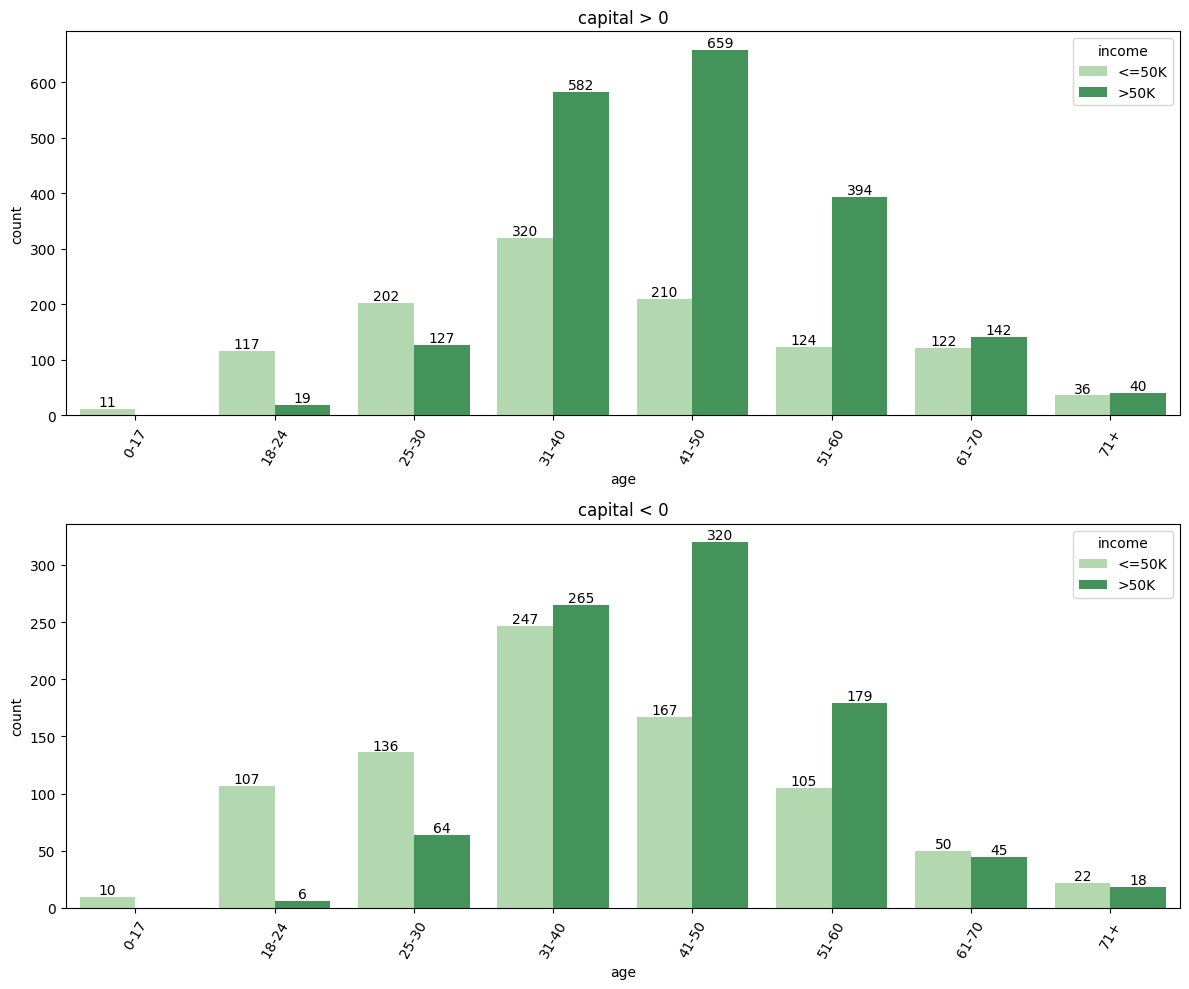

In [39]:
fig, axes = plt.subplots(2,1,figsize=(12,10))
count_sth_grouped(imputed, 0, "capital", "age", 
                  title="capital > 0",
                  relation="g", hue_col="income",
                  ax=axes[0])

count_sth_grouped(imputed, 0, "capital", "age", 
                  title="capital < 0",
                  relation="l", hue_col="income",
                  ax=axes[1])
save('capital0age')

In [40]:
df_train[df_train['capital'] > 0].shape

(3105, 12)

# capital < 0

In [41]:
imputed[imputed['capital']<0].shape, imputed[imputed['capital']>0].shape

((1741, 12), (3105, 12))